In [13]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting()

# Ângulos de Euler
phi, theta, psi = dynamicsymbols('\phi \ttheta \psi')

# Angular Rate in the Body Frame
p, q, r = dynamicsymbols('p q r')

# Matrizes de rotação q = R*p (q -> inertial frame; p -> body frame)
Rx = rot_axis1(phi).T
Ry = rot_axis2(theta).T
Rz = rot_axis3(psi).T

R = Rz*Ry*Rx

Rb2i = R
Ri2b = R.T

# q_dot = R'*p (p constante p/ braço fixo)
# q_dot = R'*(RT*q) (map q to q_dot - Inertial Frame)
# RT*q_dot = p_dot = RT*R'*p (map p to p_dot)
# RT*R' and R'*RT are both skew-symmetric (definido por 3 termos)
RT_Rdot = simplify(R.T*diff(R)) # (Body Frame)
Rdot_RT = simplify(diff(R)*R.T) # (Inertial Frame)

# pqr (rpy,rpy_dot)
pqr = Matrix([diff(phi),0,0])+Rx.T*Matrix([0,diff(theta),0])+Rx.T*Ry.T*Matrix([0,0,diff(psi)])

# Transformação de velocidades angulares de I --> B
Ti2b = Matrix([[1,0,-sin(theta)],[0,cos(phi),cos(theta)*sin(phi)],[0,-sin(phi),cos(theta)*cos(phi)]])

# Transformação de velocidades angulares de B --> I
Tb2i = simplify(Ti2b**(-1))

# rpy_dot (rpy,pqr)
rpy_dot = simplify(Tb2i*Matrix([p,q,r]))

# Tb2i_dot
Tb2i_dot = simplify(diff(Tb2i))

# pqr_dot (rpy,rpy_dot)
pqr_dot = simplify(diff(pqr))

# rpy_ddot (rpy,rpy_dot)
rpy_ddot = simplify(Tb2i_dot*pqr + Tb2i*diff(Matrix([p,q,4])))


In [3]:
Rx # B->I

⎡1      0          0     ⎤
⎢                        ⎥
⎢0  cos(\phi)  -sin(\phi)⎥
⎢                        ⎥
⎣0  sin(\phi)  cos(\phi) ⎦

In [5]:
Ry # B->I

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

In [6]:
Rz # B->I

⎡cos(\psi)  -sin(\psi)  0⎤
⎢                        ⎥
⎢sin(\psi)  cos(\psi)   0⎥
⎢                        ⎥
⎣    0          0       1⎦

In [7]:
R # Rb2i

⎡cos(\psi)⋅cos(θ)  sin(\phi)⋅sin(θ)⋅cos(\psi) - sin(\psi)⋅cos(\phi)  sin(\phi)
⎢                                                                             
⎢sin(\psi)⋅cos(θ)  sin(\phi)⋅sin(\psi)⋅sin(θ) + cos(\phi)⋅cos(\psi)  -sin(\phi
⎢                                                                             
⎣    -sin(θ)                       sin(\phi)⋅cos(θ)                           

⋅sin(\psi) + sin(θ)⋅cos(\phi)⋅cos(\psi) ⎤
                                        ⎥
)⋅cos(\psi) + sin(\psi)⋅sin(θ)⋅cos(\phi)⎥
                                        ⎥
       cos(\phi)⋅cos(θ)                 ⎦

In [9]:
R.T # Ri2b

⎡                cos(\psi)⋅cos(θ)                                  sin(\psi)⋅c
⎢                                                                             
⎢sin(\phi)⋅sin(θ)⋅cos(\psi) - sin(\psi)⋅cos(\phi)  sin(\phi)⋅sin(\psi)⋅sin(θ) 
⎢                                                                             
⎣sin(\phi)⋅sin(\psi) + sin(θ)⋅cos(\phi)⋅cos(\psi)  -sin(\phi)⋅cos(\psi) + sin(

os(θ)                       -sin(θ)     ⎤
                                        ⎥
+ cos(\phi)⋅cos(\psi)   sin(\phi)⋅cos(θ)⎥
                                        ⎥
\psi)⋅sin(θ)⋅cos(\phi)  cos(\phi)⋅cos(θ)⎦

In [13]:
RT_Rdot # map p to p_dot (Body Frame)

⎡                  0                     sin(\phi)⋅θ̇ - cos(\phi)⋅cos(θ)⋅\pṡi
⎢                                                                             
⎢-sin(\phi)⋅θ̇ + cos(\phi)⋅cos(θ)⋅\pṡi                    0                  
⎢                                                                             
⎣-sin(\phi)⋅cos(θ)⋅\pṡi - cos(\phi)⋅θ̇          -sin(θ)⋅\pṡi + \pḣi        

  sin(\phi)⋅cos(θ)⋅\pṡi + cos(\phi)⋅θ̇⎤
                                       ⎥
          sin(θ)⋅\pṡi - \pḣi         ⎥
                                       ⎥
                    0                  ⎦

In [14]:
Rdot_RT # map q to q_dot (Inertial Frame)

⎡                  0                              sin(θ)⋅\pḣi - \pṡi        
⎢                                                                             
⎢        -sin(θ)⋅\pḣi + \pṡi                             0                  
⎢                                                                             
⎣-sin(\psi)⋅cos(θ)⋅\pḣi - cos(\psi)⋅θ̇  -sin(\psi)⋅θ̇ + cos(\psi)⋅cos(θ)⋅\pḣ

   sin(\psi)⋅cos(θ)⋅\pḣi + cos(\psi)⋅θ̇⎤
                                        ⎥
   sin(\psi)⋅θ̇ - cos(\psi)⋅cos(θ)⋅\pḣi⎥
                                        ⎥
i                    0                  ⎦

In [18]:
pqr # pqr (rpy_dot)

⎡        \phi - \psi⋅sin(θ)         ⎤
⎢                                   ⎥
⎢\psi⋅sin(\phi)⋅cos(θ) + θ⋅cos(\phi)⎥
⎢                                   ⎥
⎣\psi⋅cos(\phi)⋅cos(θ) - θ⋅sin(\phi)⎦

In [16]:
Ti2b # Transformação de velocidades angulares I->B

⎡1      0           -sin(θ)     ⎤
⎢                               ⎥
⎢0  cos(\phi)   sin(\phi)⋅cos(θ)⎥
⎢                               ⎥
⎣0  -sin(\phi)  cos(\phi)⋅cos(θ)⎦

In [19]:
rpy_dot # rpy_dot (pqr)

⎡p + q⋅sin(\phi)⋅tan(θ) + r⋅cos(\phi)⋅tan(θ)⎤
⎢                                           ⎥
⎢         q⋅cos(\phi) - r⋅sin(\phi)         ⎥
⎢                                           ⎥
⎢         q⋅sin(\phi)   r⋅cos(\phi)         ⎥
⎢         ─────────── + ───────────         ⎥
⎣            cos(θ)        cos(θ)           ⎦

In [3]:
Tb2i # Transformação de velocidades angulares B->I

⎡1  sin(\phi)⋅tan(θ)  cos(\phi)⋅tan(θ)⎤
⎢                                     ⎥
⎢0     cos(\phi)         -sin(\phi)   ⎥
⎢                                     ⎥
⎢      sin(\phi)         cos(\phi)    ⎥
⎢0     ─────────         ─────────    ⎥
⎣        cos(θ)            cos(θ)     ⎦

In [4]:
Tb2i_dot # Tb2i_dot

⎡   sin(\phi)⋅θ̇                                                     cos(\phi)
⎢0  ──────────── + cos(\phi)⋅tan(θ)⋅\pḣi  -sin(\phi)⋅tan(θ)⋅\pḣi + ─────────
⎢        2                                                                2   
⎢     cos (θ)                                                          cos (θ)
⎢                                                                             
⎢0            -sin(\phi)⋅\pḣi                        -cos(\phi)⋅\pḣi        
⎢                                                                             
⎢   sin(\phi)⋅tan(θ)⋅θ̇ + cos(\phi)⋅\pḣi  -sin(\phi)⋅\pḣi + cos(\phi)⋅tan(θ)
⎢0  ─────────────────────────────────────  ───────────────────────────────────
⎣                   cos(θ)                                 cos(θ)             

⋅θ̇⎤
───⎥
   ⎥
   ⎥
   ⎥
   ⎥
   ⎥
⋅θ̇⎥
───⎥
   ⎦

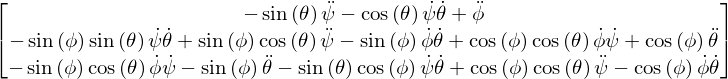

In [14]:
pqr_dot # pqr_dot (rpy,rpy_dot)

In [10]:
rpy_ddot # rpy_ddot (rpy,rpy_dot)

⎡\psi⋅θ̇                                            ⎤
⎢─────── + θ⋅tan(θ)⋅\pḣi + sin(\phi)⋅tan(θ)⋅q̇ + ṗ⎥
⎢ cos(θ)                                            ⎥
⎢                                                   ⎥
⎢         -\psi⋅cos(θ)⋅\pḣi + cos(\phi)⋅q̇         ⎥
⎢                                                   ⎥
⎢      \psi⋅sin(θ)⋅θ̇ + θ⋅\pḣi + sin(\phi)⋅q̇      ⎥
⎢      ───────────────────────────────────────      ⎥
⎣                       cos(θ)                      ⎦